In [51]:
import tensorflow as tf
import numpy as np
import math
import sklearn

In [74]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28,28

(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [54]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train shape:', y_train.shape)
print(y_train.shape[0],'train samples')
print(y_test.shape[0],'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_train shape: (60000, 10)
60000 train samples
10000 test samples


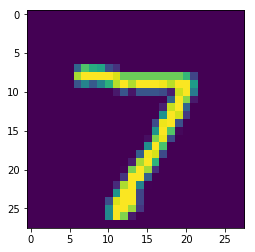

In [55]:
plt.figure()
img = x_test[0].reshape(28,28)
plt.imshow(img)
plt.show()

In [56]:
x_train0 = x_train.reshape(60000,784)
x_test0 = x_test.reshape(10000,784)
X = np.append(x_train0, x_test0, axis = 0)
np.shape(X)

(70000, 784)

In [57]:
import numpy as np
def svd_pca(data, k):
    data = data.astype("float64")
    data -= np.mean(data, axis = 0)
    U,S,V = np.linalg.svd(data, full_matrices = False)
    return U[:,:k].dot(np.diag(S)[:k,:k])
X_pca = svd_pca(X,50)

In [58]:
X_pca[:,3:5]

array([[ 2.1839137 , -0.19298083],
       [ 1.90228783, -3.2999151 ],
       [-2.07537594, -1.22807578],
       ...,
       [ 1.70586104,  2.64176687],
       [ 1.10787816, -0.6088774 ],
       [-3.10217654,  0.69682747]])

In [59]:
train_pca = X_pca[:60000, :25]
test_pca = X_pca[60000:,:25]

In [61]:
import sklearn
from sklearn.linear_model import LogisticRegression
print("y_train:",y_train.shape)

for i in range(5):
    train_pca = X_pca[:60000, :5+10*i]
    test_pca = X_pca[60000:,:5+10*i]
    y_train0 = y_train.nonzero()[1].reshape(-1,1)
    print("y_train0",y_train0.shape)
    print("train_pca",train_pca.shape)
print(y_train0.shape)
print(train_pca.shape)

y_train: (60000, 10)
y_train0 (60000, 1)
train_pca (60000, 5)
y_train0 (60000, 1)
train_pca (60000, 15)
y_train0 (60000, 1)
train_pca (60000, 25)
y_train0 (60000, 1)
train_pca (60000, 35)
y_train0 (60000, 1)
train_pca (60000, 45)
(60000, 1)
(60000, 45)


In [119]:
import sklearn
from sklearn.linear_model import LogisticRegression

for i in range(5):
    train_pca = X_pca[:60000, :5+10*i]
    test_pca = X_pca[60000:,:5+10*i]
    y_train0 = y_train.nonzero()[1].reshape(-1,1)
    model = LogisticRegression()
    model.fit(train_pca,y_train0)
    y = model.predict(test_pca)
    a = (y == y_test)
    print(sum(y == y_test.nonzero()[1])/len(y))

C:\Users\18501\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18501\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18501\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\18501\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\18501\Anaconda\lib\site-packages\sklearn\linear_model\logistic

0.6535


C:\Users\18501\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\18501\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18501\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18501\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8257


C:\Users\18501\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\18501\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18501\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18501\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8816


C:\Users\18501\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\18501\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18501\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18501\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8914
0.9032


C:\Users\18501\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


# CNN

In [63]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28,28

(x_train, y_train),(x_test,y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),
                activation = 'relu',
                input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0,5))
model.add(Dense(num_classes,activation = 'softmax'))
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])
model.fit(x_train,y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)

print('test lose:', score[0])
print('test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 119s 2ms/step - loss: 0.2056 - acc: 0.9356 - val_loss: 0.0537 - val_acc: 0.9834
Epoch 2/12
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0521 - acc: 0.9840 - val_loss: 0.0346 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0342 - acc: 0.9895 - val_loss: 0.0382 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0250 - acc: 0.9920 - val_loss: 0.0339 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0183 - acc: 0.9945 - val_loss: 0.0285 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0146 - acc: 0.9953 - val_loss: 0.0288 - val_acc: 0.9910
Epoch 7/12
60000/60000 [=========================

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [79]:
def make_intermediate_function(model,layer_ind):
    input_node = model.input
    output_layer = model.layers[layer_ind]
    output_node = output_layer.output
    name = output_layer.name
    keras_func = K.function([input_node],[output_node])
    func = lambda x: keras_func([x.reshape((1,)+x.shape)])[0][0,:]
    return name, func

def plot_features(input_image,name,func):
    output_features = func(input_image)
    n_ims = output_features.shape[-1]
    n_cols = 8
    f, axarr = plt.subplots(math.ceil(n_ims/n_cols),n_cols)
    axarr = axarr.reshape(-1)
    for i in range(n_ims):
        canvas = axarr[i]
        canvas.imshow(output_features[:,:,i])
        canvas.axis('off')
    f.suptitle('Output Feature Maps of layer {}'.format(name))
    
def plot_all_features(input_image,model, layer_inds):
    plt.imshow(input_image.reshape(input_image.shape[:-1]),cmap='gray')
    plt.title('Input Image')
    for ind in layer_inds:
        name,func = make_intermediate_function(model,ind)
        plot_features(input_image,name,func)

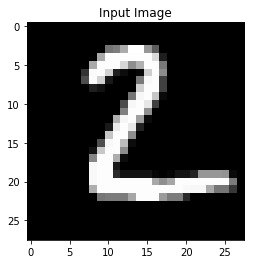

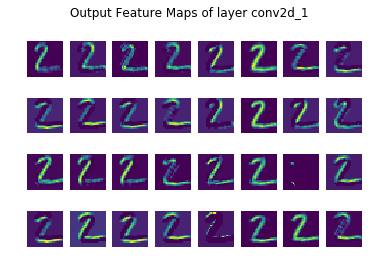

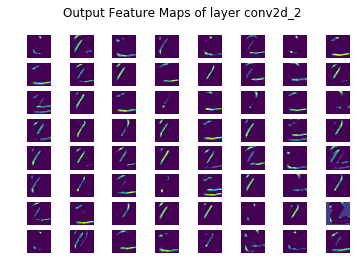

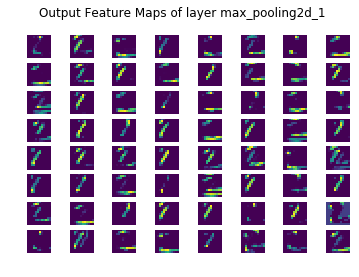

In [80]:
plot_all_features(x_test[1],model,[0,1,2])

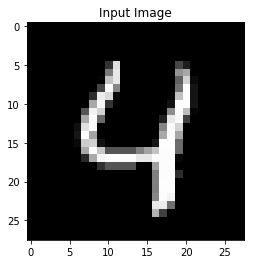

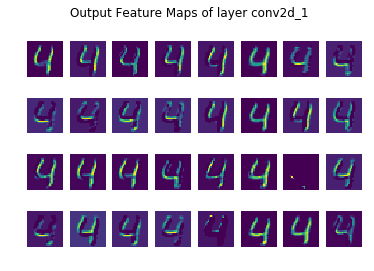

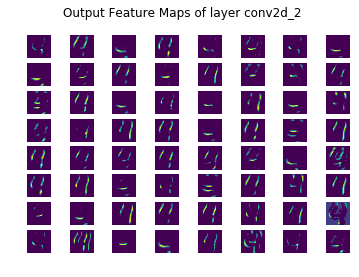

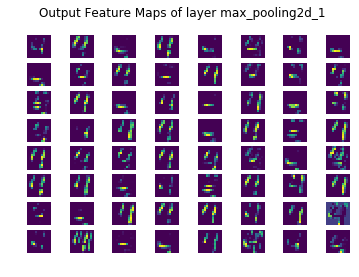

In [84]:
plot_all_features(x_test[4],model,[0,1,2])

#DCGAN

In [87]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.datasets import mnist
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [89]:
(X_train, _), _ = mnist.load_data()
X_train = (X_train.astype(np.float32)-127.5)/127.5
print('X像素取值范围是[{}，{}]'.format(X_train.min(),X_train.max()))
X_train.shape = X_train.shape + (1,)

X像素取值范围是[-1.0，1.0]


In [92]:
batch_size = 128
n_epochs = 400
noise_dim = 100

In [99]:
#生成网络，是一个反向的CNN，我们把全连接层放在前面，然后是激活，全连接，激活，后面加上两次卷积过程。最后得到一个真实的图像
#生成网络输入的是一个噪声，反向VNN依然保持卷积三明治的结构，但是把BLOCK反过来
#定义生成网络：输入100的随机噪声，输出一张伪造的MNIST图像
def generator_model():
    model =Sequential()
    #开始就是全连接层 fully connected layer
    model.add(Dense(input_dim =100, units =1024))
    #非线性 nonlinear
    model.add(Activation('tanh'))
    #非线性得出的结果输入下一个全连接层
    model.add(Dense(128*7*7))
    #here we use batch normalizaion to avoid explosing 
    #and vanishing gradient before going to activation and convolv
    model.add(BatchNormalization())
    #tanh作为生成模型的激活函数
    model.add(Activation('tanh'))
    #之前是生成了一个噪声，现在reshape到一个7*7，128的地方
    model.add(Reshape((7,7,128),input_shape = (128*7*7,)))
    #upsampling is inverse of pooling, image becomes 14*14
    model.add(UpSampling2D(size=(2,2)))
    #进入到卷积，convolv is a linear operator, it is inversible
    model.add(Conv2D(64,(5,5),padding = 'same'))
    model.add(Activation('tanh'))
    #再次升维 turn image back to 28*28
    model.add(UpSampling2D(size=(2,2)))
    model.add(Conv2D(1,(5,5),padding = 'same'))
    #here we have one layer out of 64
    model.add(Activation('tanh'))
    return model

g = generator_model()
g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              103424    
_________________________________________________________________
activation_17 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 6272)              6428800   
_________________________________________________________________
batch_normalization_8 (Batch (None, 6272)              25088     
_________________________________________________________________
activation_18 (Activation)   (None, 6272)              0         
_________________________________________________________________
reshape_8 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 128)       0         
__________

In [102]:
#定义鉴别网络：输入一张图像，输出0（伪造）/1（真实）
def discrimination_model():
    model = Sequential()
    model.add(Conv2D(64,(5,5),
            padding = 'same',
            input_shape = (28,28,1))
             )
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(128,(5,5)))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('tanh'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

d = discrimination_model()
d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
activation_27 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 128)       204928    
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              13108224  
_________________________________________________________________
activation_28 (Activation)   (None, 1024)              0         
__________

In [103]:
#为训练的第二步准备的网络，先来一个generator,再来一个discriminator
g_d = Sequential()
g_d.add(g)
g_d.add(d)

训练

In [116]:
n_images = X_train.shape[0]
n_batches = n_images//batch_size

d.trainable = True
d.compile(loss = keras.losses.binary_crossentropy, optimizer = SGD(lr= 0.0005, momentum = 0.8, nesterov = True))#0.5 0.8 ok
#d.compile(loss = keras.losses.binary_crossentropy, optimizer = keras.optimizers.RMSprop())
d.trainable = False
g_d.compile(loss = keras.losses.binary_crossentropy, optimizer =SGD(lr = 0.005, momentum = 0.9, nesterov = True)) # 0.05 ok
#g_d.compile(loss = keras.losses.binary_crossentropy, optimizer = keras.optimizers.RMSprop())

print('here we go!!!!!!!')
for epoch in range(n_epochs):
    #randomly shuffle the images for training
    image_ordering = np.random.permutation(n_images)
    print('Training on epoch{}'.format(epoch))
    d_losses = []
    g_losses = []
    for batch in range(n_batches):
        #第一步，训练D识别伪造图像
        real_images = X_train[image_ordering[(batch*batch_size):((batch+1)*batch_size)],:,:,:]
        noise = np.random.uniform(low = -1, high = 1, size = (batch_size, noise_dim))
        fake_images = g.predict(noise, verbose = 0)
        images = np.concatenate([real_images, fake_images])
        real_fake = [1]*batch_size + [0] *batch_size#标签
        #d.trainable = True
        #d.compile(losses = keras.losses.binary_crossentropy, optimizer = opt)
        #here should be the min max game, real_fake near it, train discriminator to maximum find real and fanlsify
        #fake,real_fake is our metric, here form weights of d
        d_loss = d.train_on_batch(images,real_fake)
        d_losses.append(d_loss)
        #第二步：训练G欺骗D
        noise = np.random.uniform(low = -1, high = 1, size =(batch_size, noise_dim))
        real_fake = [1]*batch_size
        #d.trainable = False
        #g_d.compile(loss = keras.losses.binary_crossentropy,optimizer =opt)
        #here is just to try to maxium chance to fool the discriminator,the input is noise, here forms weights of g
        g_loss = g_d.train_on_batch(noise,real_fake)
        g_losses.append(g_loss)
        print('batch{0}:d_loss = {1:.4f}, g_loss = {2:.4f}'.format(batch,d_loss,g_loss),end ='\r')
        print()
        print('avg d_loss = {},avg g_loss = {}'.format(np.mean(d_losses),np.mean(g_losses)))
        
        
g.save_weights('dcgan_gen.h5',overwrite = True)
d.save_weights('dcgan_dis.h5',overwrite = True)

here we go!!!!!!!
Training on epoch0


C:\Users\18501\Anaconda\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


batch0:d_loss = 0.6406, g_loss = 0.7951
avg d_loss = 0.640587568283081,avg g_loss = 0.7951172590255737
batch1:d_loss = 0.6480, g_loss = 0.8043
avg d_loss = 0.6443170309066772,avg g_loss = 0.7996865510940552
batch2:d_loss = 0.6442, g_loss = 0.8036
avg d_loss = 0.6442816853523254,avg g_loss = 0.8009960055351257


KeyboardInterrupt: 

In [1]:
# #如果没有经过训练，运行这段代码读取之前训练的网络参数
# d.load_weights('dcgan_dis.h5')
# d.load_weights('dcgan_gen.h5')

In [117]:
def generate_images(n_gen, seed = None):
    if seed:
        np.random.seed(seed = seed)
    noise = np.random.uniform(low=-1,high=1,size=(n_gen,noise_dim))
    fake_images = g.predict(noise)
    scores = d.predict(fake_images)
    return fake_images,scores

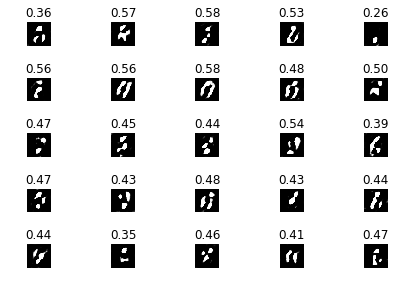

In [118]:
fake_images,scores = generate_images(25,seed = 34)
f,axarr = plt.subplots(5,5)
f.tight_layout()
axarr = axarr.reshape(-1)
for i in range(25):
    sub = axarr[i]
    sub.axes.imshow(fake_images[i,:,:,0],cmap = 'gray')
    sub.set_title('{0:.2f}'.format(scores[i,0]))
    sub.axis('off')

ModuleNotFoundError: No module named 'skimage.i0'